<a href="https://colab.research.google.com/github/MaggieWelch/labs/blob/main/MW_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! git clone https://www.github.com/DS3001/the_bootstrap

fatal: destination path 'the_bootstrap' already exists and is not an empty directory.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Q3

1. Cross tabulate treatment and outcome.


In [9]:
url = 'https://raw.githubusercontent.com/DS3001/the_bootstrap/refs/heads/main/data/diabetes_hw.csv'
df = pd.read_csv(url)
df['success'] = 0
df.loc[df['outcome']=='success','success'] = 1

print(pd.crosstab(df['treatment'], df['outcome']), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True), '\n')
print(pd.crosstab(df['treatment'], df['outcome'], margins=True, normalize=True), '\n')

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143 

outcome    failure  success  All
treatment                       
lifestyle      109      125  234
met            120      112  232
rosi            90      143  233
All            319      380  699 

outcome     failure   success       All
treatment                              
lifestyle  0.155937  0.178827  0.334764
met        0.171674  0.160229  0.331903
rosi       0.128755  0.204578  0.333333
All        0.456366  0.543634  1.000000 



2. Compute the proportion of successes for each treatment. Which treatment appears to be most effective?

In [10]:
print('lifestyle success rate: ', 125/(125+109), '\n')
print('met success rate: ', 112/(112+120), '\n')
print('rosi success rate: ', 143/(143+90), '\n')

lifestyle success rate:  0.5341880341880342 

met success rate:  0.4827586206896552 

rosi success rate:  0.6137339055793991 



According to this data, rosi appears to be the most effective treatment.

3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped by treatment type. Which treatment appears to be the most effective?

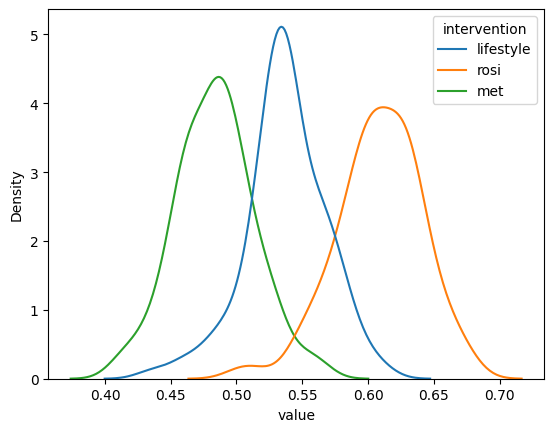

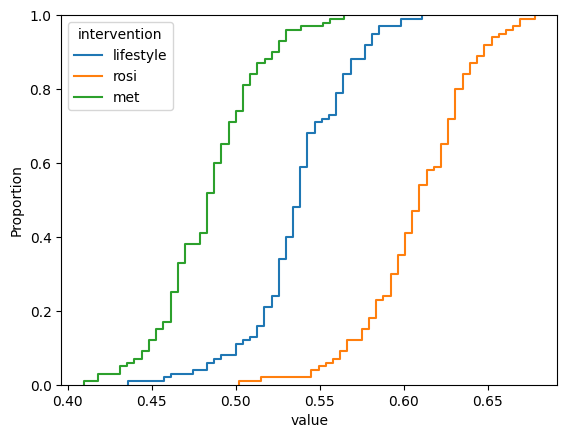

In [11]:
df_lif = df.loc[ df['treatment'] == 'lifestyle', :]
df_ros = df.loc[ df['treatment'] == 'rosi', :]
df_met = df.loc[ df['treatment'] == 'met', :]

S = 100
fx_lif = []
fx_ros = []
fx_met = []
for t in range(S):
    df_lif_t = df_lif.sample( df_lif.shape[0], axis=0, replace=True)
    df_ros_t = df_ros.sample( df_ros.shape[0], axis=0, replace=True)
    df_met_t = df_met.sample( df_met.shape[0], axis=0, replace=True)
    #
    fx_lif_t = np.mean(df_lif_t['success'])
    fx_ros_t = np.mean(df_ros_t['success'])
    fx_met_t = np.mean(df_met_t['success'])
    #
    fx_lif.append(fx_lif_t)
    fx_ros.append(fx_ros_t)
    fx_met.append(fx_met_t)

gdf_lif = pd.DataFrame({'value':fx_lif, 'intervention':'lifestyle'})
gdf_ros = pd.DataFrame({'value':fx_ros, 'intervention':'rosi'})
gdf_met = pd.DataFrame({'value':fx_met, 'intervention':'met'})
gdf = pd.concat([gdf_lif, gdf_ros, gdf_met], axis=0)

sns.kdeplot(data=gdf, x='value', hue = 'intervention')
plt.show()

sns.ecdfplot(data=gdf, x='value', hue = 'intervention')
plt.show()


This also shows that rosi appears to be the most effective treatment.

4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

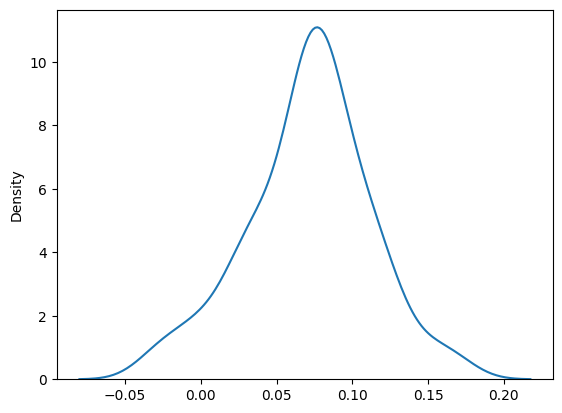

90% Confidence interval, rosi and lifestyle:  -0.0019505887531638955 ,  0.13108836799823928


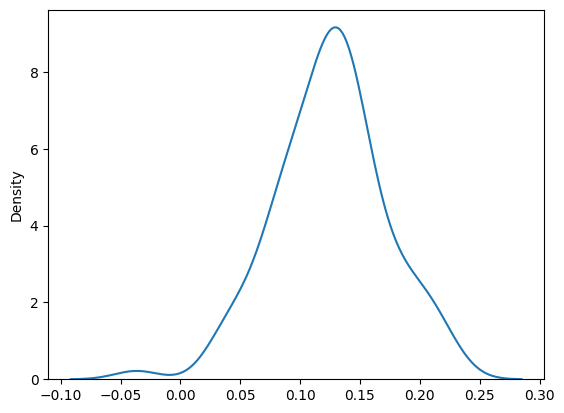

90% Confidence interval, rosi and metformin:  0.049024160130235285 ,  0.20424652212520347


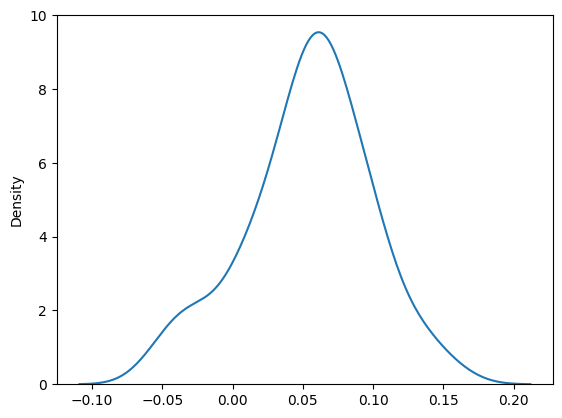

90% Confidence interval, lifestyle and metformin:  -0.029859269083406997 ,  0.12880378720895966


In [14]:
rosi_versus_lifestyle = np.array(fx_ros)-np.array(fx_lif)
sns.kdeplot(x=rosi_versus_lifestyle)
plt.show()
print('90% Confidence interval, rosi and lifestyle: ', np.quantile(rosi_versus_lifestyle,.05), ', ', np.quantile(rosi_versus_lifestyle,.95))

rosi_versus_met = np.array(fx_ros)-np.array(fx_met)
sns.kdeplot(x=rosi_versus_met)
plt.show()
print('90% Confidence interval, rosi and metformin: ', np.quantile(rosi_versus_met,.05), ', ', np.quantile(rosi_versus_met,.95))

lif_versus_met = np.array(fx_lif)-np.array(fx_met)
sns.kdeplot(x=lif_versus_met)
plt.show()
print('90% Confidence interval, lifestyle and metformin: ', np.quantile(lif_versus_met,.05), ', ', np.quantile(lif_versus_met,.95))

The only significant difference is seen in rosi and metformin, as it is the only confidence interval that does not contain 0.  

#Q4

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).

In [17]:
url = 'https://raw.githubusercontent.com/DS3001/the_bootstrap/refs/heads/main/data/heart_hw.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [18]:
df['treat'] = 0
df['intercept'] = 1
df.loc[ df['transplant']=='treatment','treat']=1

print( pd.crosstab( df['transplant'], df['y']), '\n')

# a.
print('Proportion survived, control: ', 4/34, '\n')
print('Average treatment effect: ', 24/(24+45)-4/(30+4))

y            0   1
transplant        
control     30   4
treatment   45  24 

Proportion survived, control:  0.11764705882352941 

Average treatment effect:  0.23017902813299232


2. Regress y on transplant using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.

In [19]:
from sklearn.linear_model import LinearRegression

y = df['y']
X = df.loc[:,['intercept', 'treat'] ]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)

Regression Coefficients:  [0.11764706 0.23017903]


The intercept or constant is equlivalent to the control group effect. The slope is equivalent to the treatment effect.

3. We'd like to include age in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress y on transplant, age, and transplant
 age. You can do this using a linear regression. How do the intercept and the coefficient on transplanttreatment change?

Regression Coefficients:  [ 0.70195697  0.26470169 -0.01360722]


<Axes: xlabel='age'>

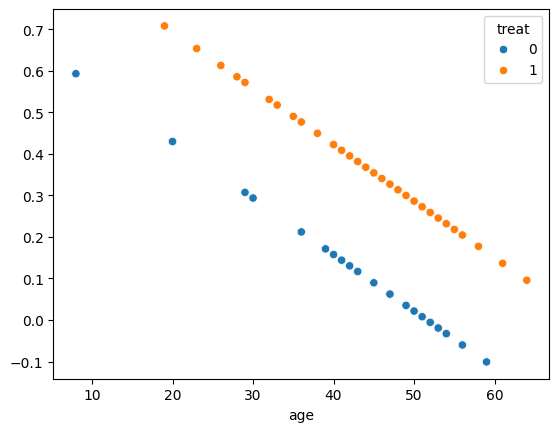

In [21]:
y = df['y']
X = df.loc[:,['intercept', 'treat', 'age'] ]

reg = LinearRegression(fit_intercept=False).fit(X,y)

print('Regression Coefficients: ', reg.coef_)

y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

The intercept and slope increase. This indicates that when controlling for age, there seems to be a higher treatment effect.

4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.

Regression Coefficients:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -7.70114914e-03
 -2.70227509e-03  2.01932637e-05]


<Axes: xlabel='age'>

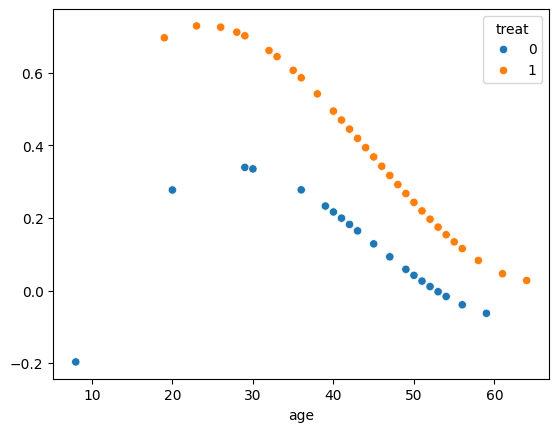

In [22]:
from sklearn.linear_model import LinearRegression
df['treatXage'] = df['treat']*df['age']
df['age_sq'] = df['age']**2
df['treatXage_sq'] = df['treat']*df['age_sq']
df['age_cu'] = df['age']**3
df['treatXage_cu'] = df['treat']*df['age_cu']

y = df['y']
X = df.loc[:,['intercept', 'treat', 'age',
              'treatXage',
              'age_sq', 'age_cu'] ]
reg = LinearRegression(fit_intercept=False).fit(X,y)
print('Regression Coefficients: ', reg.coef_)
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

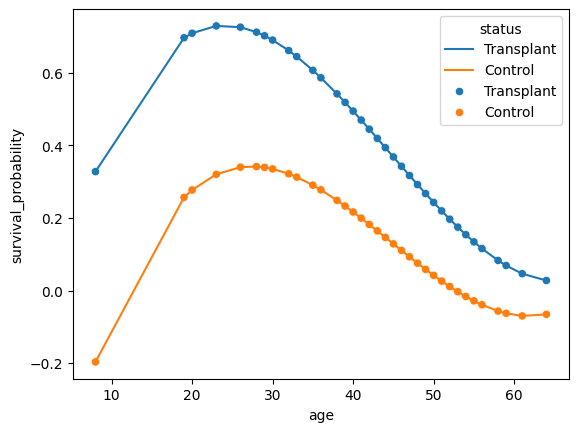

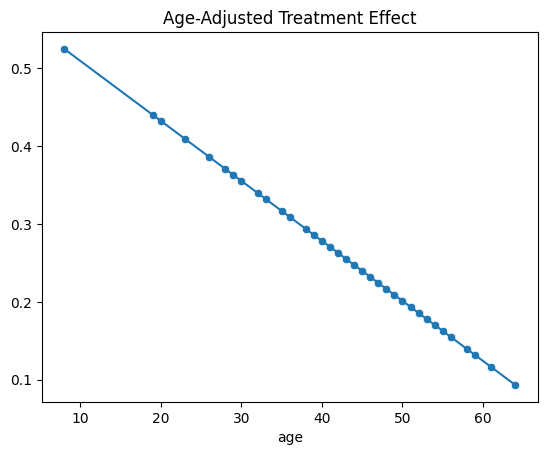

In [23]:
X_all_transplant = X
X_all_transplant['treat'] = 1
X_all_transplant['treatXage'] = X['age']
y_hat_transplant = reg.predict(X_all_transplant)

X_no_transplant = X
X_no_transplant['treat'] = 0
X_no_transplant['treatXage'] = 0
y_hat_control = reg.predict(X_no_transplant)

gdf_treat = pd.DataFrame({'survival_probability':y_hat_transplant, 'age':X['age'], 'status':'Transplant'})
gdf_control = pd.DataFrame({'survival_probability':y_hat_control, 'age':X['age'], 'status':'Control'})
gdf = pd.concat([gdf_treat,gdf_control],axis=0)

sns.lineplot(data=gdf,x='age',y='survival_probability',hue = 'status')
sns.scatterplot(data=gdf,x='age',y='survival_probability',hue = 'status')
plt.show()

age_adjusted_treatment_effect = y_hat_transplant - y_hat_control
sns.lineplot(x=X['age'],y=age_adjusted_treatment_effect).set_title('Age-Adjusted Treatment Effect')
sns.scatterplot(x=X['age'],y=age_adjusted_treatment_effect)
plt.show()

The graphs display that those who receive the transplant are more likely to survive than those who have not, which is intuitive. The graphs also show that for both groups, the liklihood of surviving peaks at around 20 years old, and declines as you age.

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

  I am against the use of models to select who receives organ transplants. If they were to use a model such as this one, giving the heart to the candidate who is most likely to survive would result in all of the hearts going to those in their 20s. I think life changing decisions such as this should not be determined by algorithms.